# Sobel Filtering

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3) # 1 0 : X축 방향
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3) # 0 1 : Y축 방향

#2
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) # normalize : 영상화

#3
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
mag = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src', src)
cv2.imshow('dstX', dstX)
cv2.imshow('dstY', dstY)
cv2.imshow('dstM', dstM)
cv2.waitKey()
cv2.destroyAllWindows()

mag: 0.0 1053.8966064453125 (0, 0) (356, 328)


In [5]:
## src = imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
## src = imread('./data/line.png', cv2.IMREAD_GRAYSCALE)

In [7]:
#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True) # cartToPolar : magnitude, angle 모두 구하는 함수
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()

angle: 0.0 359.8861083984375 (0, 0) (357, 120)


In [8]:
#3 참고
width, height = mag.shape[:2]
angleM = np.full((width, height, 3), (255, 255, 255), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0:  # if mag[y, x] > 100: # edge
            if angle[y, x] == 0:
                angleM[y, x] = (0, 0, 255)  # red
            elif angle[y, x] == 90:
                angleM[y, x] = (0, 255, 0) # green
            elif angle[y, x] == 180:
                angleM[y, x] = (255, 0, 0) # blue
            elif angle[y, x] == 270:
                angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] = (128, 128, 128) # gray
                
cv2.imshow('angleM', angleM)
cv2.waitKey()
cv2.destroyAllWindows()

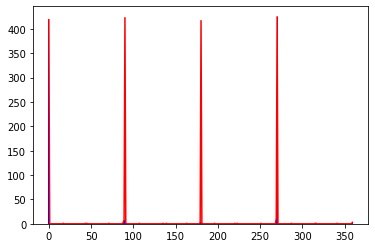

In [11]:
#4
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge, histSize=[360], ranges=[0, 360])
hist = hist.flatten()
## plt.title('hist: binX = np.arange(360)')
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()